<a href="https://colab.research.google.com/github/KevinFDI/IML-Practica-1/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. ANÁLISIS DEL DATASET

Instalo la librería Pandas, Numpy y Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**A) Utilizo la librería Pandas para abrir el archivo.**

In [2]:
iris = pd.read_csv(r"https://raw.githubusercontent.com/KevinFDI/IML-Practica-1/main/iris.csv")

**B) Utilizo el gráfico de scatter_matriz y otros similares pera visualizar las variables.**

In [3]:
# Scatter permite visualizar una dispersión de puntos en un espacio 2D.

# Al tener 4 variables (iris), no se puede visualizar todas al mismo tiempo, pero se puede hacer un corte 2D para dos de ellas.

from sklearn.preprocessing import LabelEncoder

# Transformo el iris.ame a números.

le = LabelEncoder()
le.fit(iris.name)
name = le.transform(iris.name)

Text(0, 0.5, 'sepal width')

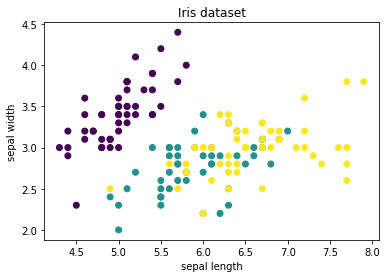

In [4]:
# Relación entre la longitud y ancho del sépalo.

plt.scatter(iris.sepal_length, iris.sepal_width, c=name)
plt.title('Iris dataset')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [5]:
# Otra alternativa es usar la seguiente librería que permite generar un gráfico interactivo y no hace falta transformar el iris.name a números.

!pip install plotly_express

import plotly_express as px

px.scatter(iris, x='sepal_length', y='sepal_width', color='name')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


OBSERVACIÓN: A mayor altura menor será el ancho de la sépalo.

Text(0, 0.5, 'petal width')

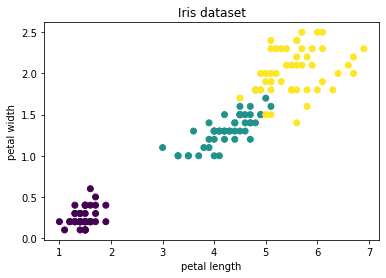

In [6]:
# Relación entre el ancho y la longitud del petalo.

plt.scatter(iris.petal_length, iris.petal_width, c=name)
plt.title('Iris dataset')
plt.xlabel('petal length')
plt.ylabel('petal width')

In [7]:
px.scatter(iris, x='petal_length', y='petal_width', color='name')

OBSERVACIÓN: las características de los pétalos ofrecen una mayor división de grupos en comparación con las características de los sépalos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d2fec6fd0>,
      dtype=object)

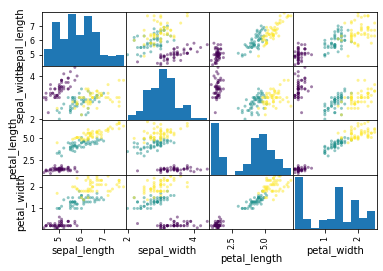

In [8]:
# Matriz con scatter 2D para cada par de features.

pd.plotting.scatter_matrix(iris, c = name)

*   Se puede obersvar que la longitud y la anchura de las flores están relacionadas. 
*   Hay una fuerte relación entre las flores denomidas "Virginica" y "Versicolor" a diferencia de la "Setosa".

**C) Crea un histograma para cada columna del dataframe**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d2fd4f8d0>,
      dtype=object)

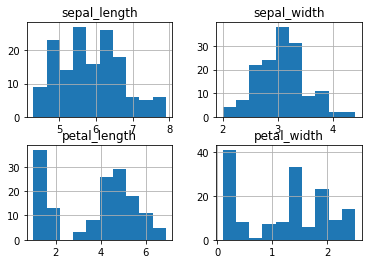

In [9]:
iris.hist()

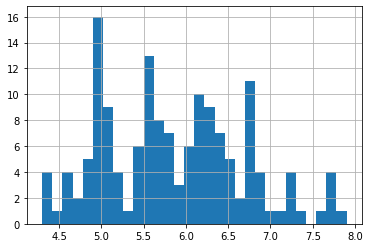

In [10]:
# Crea un histograma para la columna “sepal_length”
iris.sepal_length.hist(bins=30)

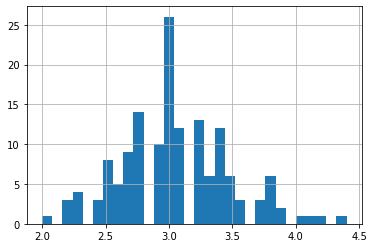

In [11]:
# Crea un histograma para la columna “sepal_width”
iris.sepal_width.hist(bins=30)

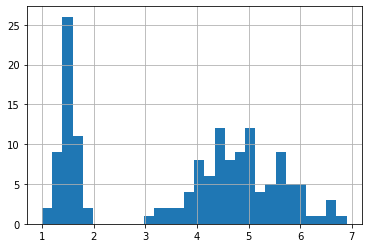

In [12]:
# Crea un histograma para la columna “petal_length”
iris.petal_length.hist(bins=30)

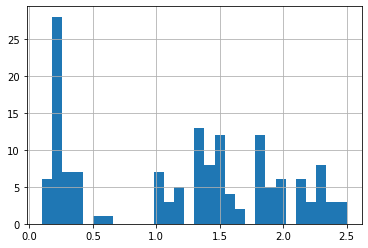

In [13]:
# Crea un histograma para la columna “petal_width”
iris.petal_width.hist(bins=30)

**D) Matriz de correlación entre features**

In [14]:
round(iris.corr(), 4)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.0000,-0.1094,0.8718,0.8180
sepal_width,-0.1094,1.0000,-0.4205,-0.3565
petal_length,0.8718,-0.4205,1.0000,0.9628
petal_width,0.8180,-0.3565,0.9628,1.0000


*   Lo que se puede observar es que el ancho y la longitud del sépalo no están correlacionados.
*   Lo contrario ocurre con el pétalo ya que la longitud y el ancho están altamente correlacionados.

**E) Diagramas de Caja**

Los diagramas de caja le permiten visualizar y comparar la distribución y la tendencia central de valores numéricos mediante sus cuartiles. 
Los cuartiles son una forma de dividir valores numéricos en cuatro grupos iguales basados en cinco valores clave: 

*   Mínimo: Es la línea que se encuentra por debajo de cada una de las cajas. Se puede observar que el mínimo del sépalo supera ampliamente al del pétalo tanto en altura como en anchura.
*   Primer cuartil: Esta representada como la base de la caja. Ademas, representa el 25% de los datos y permite evaluar rápidamente la dispersión y la tendencia central de los datos.
*   Mediana: Esta variable se representa con la línea verde, ubicada entre el primer y el tercer cuatril. la mediana representa el valor de la variable de posición central en un conjunto de datos ordenados.
*   Tercer cuartil: Este está representado como el techo a la caja. El mismo identifica que el 75% de los datos es menor que o igual a este valor.
*   Máximo: Es el máximo valor que cada variable posee y se representa con la línea negra que se encuentra encima de la caja.
*   Outlies: Por último, quería mencionar que los outlies representados con círculos son una observación anormal y extrema en la muestra que puede afectar la estimación de los parámetros.


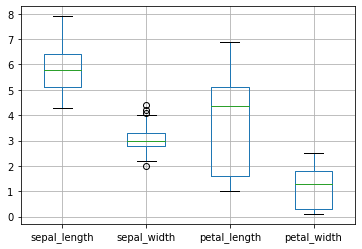

In [15]:
iris.boxplot()

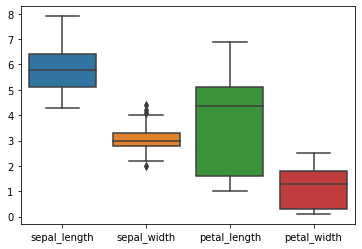

In [16]:
# Otra alternariva es utilizar la siguiente librería que le otroga colores a los distintas variables.

import seaborn as sns

sns.boxplot(data=iris)

**F) Normalización de las variables.**

Es un problema que cada feature posea su propio rango de datos por lo que hay que normalizarlos de algún modo.
Para normalizar hay **dos alternativas**:

In [17]:
# ALTERNATIVA 1: Normalizacon con mínimos y máximos entre 0 y 1.

# Defino un diccionario para guardar la data normalizada.
dic_iris_norm1 = dict()

# Con un ciclo iterativo recorro el dataset iris fila por fila.
for data in iris.columns:
    if data == "name":
        dic_iris_norm1[data] = iris[data]
        continue
    
    # Con la librería de Numpy puedo utilizar las fórmulas de min y max.
    min_iris = np.min(iris[data])
    max_iris = np.max(iris[data])
    
    # Utilizo la fórmula vista en clase: x= (x-min(x)) / (max(x)-min(x))
    dic_iris_norm1[data] = round((iris[data]-min_iris)/(max_iris-min_iris), 2)

# Utilizo de la librería de Pandas DataFrame para imprimir los datos como una tabla de dos dimensiones.
iris_norm1 = pd.DataFrame(dic_iris_norm1)
print(iris_norm1)

     sepal_length  sepal_width  petal_length  petal_width       name
0            0.22         0.62          0.07         0.04     setosa
1            0.17         0.42          0.07         0.04     setosa
2            0.11         0.50          0.05         0.04     setosa
3            0.08         0.46          0.08         0.04     setosa
4            0.19         0.67          0.07         0.04     setosa
..            ...          ...           ...          ...        ...
145          0.67         0.42          0.71         0.92  virginica
146          0.56         0.21          0.68         0.75  virginica
147          0.61         0.42          0.71         0.79  virginica
148          0.53         0.58          0.75         0.92  virginica
149          0.44         0.42          0.69         0.71  virginica

[150 rows x 5 columns]


In [18]:
# ALTERNATIVA 2: Normalizar con Z.

# Defino un diccionario para guardar la data normalizada.
dic_iris_norm2 = dict()

# Con un ciclo iterativo recorro el dataset iris fila por fila.
for data in iris.columns:
    if data == "name":
        dic_iris_norm2[data] = iris[data]
        continue
    
    # Con la librería de Numpy puedo utilizar las fórmulas de mean y std.
    mean_iris = np.mean(iris[data])
    std_iris = np.std(iris[data])
    
    # Utilizo la fórmula vista en clase: x= (x-mean(x)) / stdev(x)
    dic_iris_norm2[data] = round(((iris[data] - mean_iris) / std_iris), 2)

# Utilizo de la librería de Pandas DataFrame para imprimir los datos como una tabla de dos dimensiones.
iris_norm2 = pd.DataFrame(dic_iris_norm2)
print(iris_norm2)

     sepal_length  sepal_width  petal_length  petal_width       name
0           -0.90         1.03         -1.34        -1.31     setosa
1           -1.14        -0.12         -1.34        -1.31     setosa
2           -1.39         0.34         -1.40        -1.31     setosa
3           -1.51         0.11         -1.28        -1.31     setosa
4           -1.02         1.26         -1.34        -1.31     setosa
..            ...          ...           ...          ...        ...
145          1.04        -0.12          0.82         1.45  virginica
146          0.55        -1.28          0.71         0.92  virginica
147          0.80        -0.12          0.82         1.05  virginica
148          0.43         0.80          0.93         1.45  virginica
149          0.07        -0.12          0.76         0.79  virginica

[150 rows x 5 columns]


**B) scatter_matrix normalizado.**

scatter_matrix normalizado entre 0 y 1:


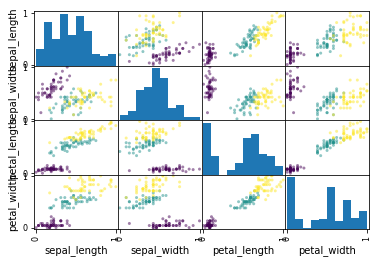

In [19]:
print("scatter_matrix normalizado entre 0 y 1:")
scatter_plot= pd.plotting.scatter_matrix(iris_norm1, c=name)

scatter_matrix normalizado con Z:


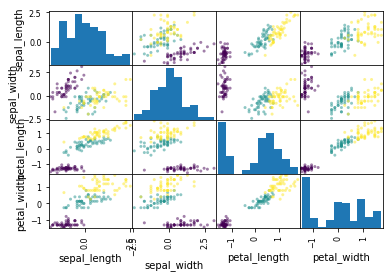

In [20]:
print("scatter_matrix normalizado con Z:")
scatter_plot= pd.plotting.scatter_matrix(iris_norm2, c=name)

**C) Histograma normalizado.**

Histograma normalizado entre 0 y 1:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d2c74f090>,
      dtype=object)

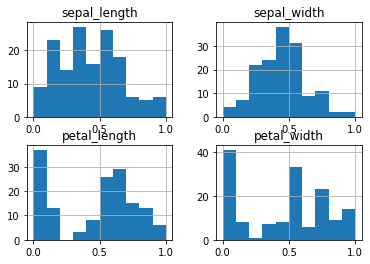

In [21]:
print("Histograma normalizado entre 0 y 1:")
iris_norm1.hist()

Histograma normalizado con Z:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d2c572350>,
      dtype=object)

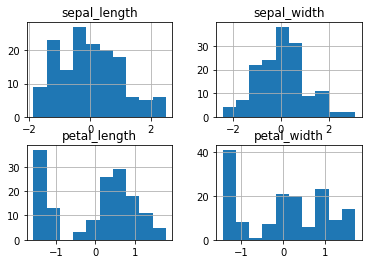

In [22]:
print("Histograma normalizado con Z:")
iris_norm2.hist()

**D) Matriz de correlación normalizado.**

In [23]:
print("Matriz de correlación normalizada entre 0 y 1:")
round(iris_norm1.corr(), 2)

Matriz de correlación normalizada entre 0 y 1:


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


In [24]:
print("Matriz de correlación normalizada con Z:")
round(iris_norm2.corr(), 2)

Matriz de correlación normalizada con Z:


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


**E) Diagrama de caja normalizado.**

Diagrama de caja normalizado entre 0 y 1:


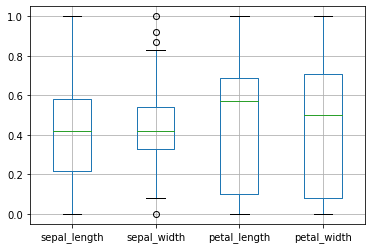

In [25]:
print("Diagrama de caja normalizado entre 0 y 1:")
iris_norm1.boxplot()

Diagrama de caja normalizado con Z:


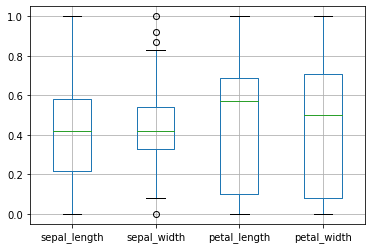

In [26]:
print("Diagrama de caja normalizado con Z:")
iris_norm1.boxplot()